# DIC LAB 3 Problem 3 : K Means on Pew Data : GAMING,JOBS AND BROADBAND

Load the libraries

In [36]:
library("XML")
library("methods")
library("dplyr")
library("tidyr")
library("ggplot2")

Read the data from the CVS file

In [37]:
totalData <- read.csv(file="dataSets/June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv", header=TRUE, sep=",")

Read the column names

In [38]:
colnames(totalData)

[1] "psraid"     "sample"     "int_date"   "lang"       "usr"       
  [6] "cregion"    "state"      "form"       "sex"        "q1"        
 [11] "q3"         "eminuse"    "intmob"     "intfreq"    "home4nw"   
 [16] "bbhome1"    "bbhome2"    "bbhome3a"   "bbhome3b"   "bbhome3c"  
 [21] "bbhome3d"   "bbhome3e"   "device1a"   "smart1"     "q4"        
 [26] "bbsmart1"   "bbsmart2"   "bbsmart3a"  "bbsmart3b"  "bbsmart3c" 
 [31] "bbsmart3d"  "bbsmart3e"  "bbsmart3f"  "bbsmart4"   "cable1"    
 [36] "cable2"     "cable3a"    "cable3b"    "cable3c"    "act19"     
 [41] "act87a"     "act87b"     "act137"     "q5a"        "q5b"       
 [46] "q5c"        "q5d"        "q5e"        "q5f"        "date1a"    
 [51] "date2a"     "date3a"     "date3b"     "date4a"     "date4b"    
 [56] "date4c"     "date4d"     "date4e"     "date4f"     "game1"     
 [61] "game2a"     "game2b"     "game2c"     "game2d"     "game2e"    
 [66] "game2f"     "game3a"     "game3b"     "game4"      "emplnw"    
 [71] "emptype1"   "emptype2"   "emptype3"   "stud"       "job1a"     
 [76] "job1b"      "job1c"      "job1d"      "job1e"      "job1f"     
 [81] "job2"       "job3a"      "job3b"      "job3c"      "job3d"     
 [86] "job3e"      "job3f"      "job3g"      "job3h"      "job4"      
 [91] "smjob1"     "smjob2a"    "smjob2b"    "smjob2c"    "smjob2d"   
 [96] "smjob2e"    "smjob3"     "smjob4a"    "smjob4b"    "smjob4c"   
[101] "smjob4d"    "smjob4e"    "snsjob1a"   "snsjob1b"   "snsjob1c"  
[106] "snsjob2a"   "snsjob2b"   "job5a"      "job5b"      "job5c"     
[111] "job5d"      "auto1a"     "auto1b"     "auto1c"     "auto1d"    
[116] "auto1e"     "auto2"      "auto3"      "age"        "marital"   
[121] "hh1"        "par"        "kidage1"    "kidage2"    "kidage3"   
[126] "educ2"      "edinst"     "disa"       "party"      "partyln"   
[131] "ideo"       "hisp"       "birth_hisp" "race"       "inc"       
[136] "ql1a"       "qc1"        "zipcode"    "weight"     "standwt"

Select the columns whom to work

In [39]:
pewData = totalData %>% select(age,emptype1,educ2,inc,race)

Show the data

In [40]:
head(pewData)

age,emptype1,educ2,inc,race
47,NA,6,99,1
63,NA,4,6,2
86,NA,1,3,1
40,1,5,6,1
65,NA,4,3,1
69,5,6,8,1


** Clean Process Begins **

Group the data and check the data which needs to be removed as per the given Questionaires

In [41]:
pewData %>% group_by(emptype1) %>% summarize(count = n())

emptype1,count
1,324
2,165
3,266
4,90
5,118
6,83
7,21
8,28
98,5
NA,901


Group the data and check the data which needs to be removed as per the given Questionaires

In [42]:
pewData %>% group_by(educ2) %>% summarize(count = n())

educ2,count
1,66
2,86
3,483
4,340
5,183
6,410
7,36
8,377
98,5
99,15


Group the data and check the data which needs to be removed as per the given Questionaires

In [43]:
pewData %>% group_by(inc) %>% summarize(count = n())

inc,count
1,157
2,187
3,180
4,165
5,164
6,275
7,208
8,197
9,163
98,117


Group the data and check the data which needs to be removed as per the given Questionaires

In [44]:
pewData %>% group_by(race) %>% summarize(count = n())

race,count
1,1513
2,246
3,54
4,49
5,17
6,68
8,18
9,36


Remove the fields which are NA from the data 

In [45]:
pewData = na.omit(pewData)

Add the filters to remove the irrelevant data as per the above analysis of the data

In [46]:
pewData = pewData %>% filter(educ2 < 10) %>%
                      filter(inc < 10) %>%
                      filter(race < 8) %>%
                      filter(emptype1 < 10)

Show how much data is left and also show the data frame

In [47]:
nrow(pewData)
head(pewData)

[1] 965

age,emptype1,educ2,inc,race
40,1,5,6,1
69,5,6,8,1
52,2,4,8,1
44,1,4,7,1
58,2,6,7,1
31,2,3,2,5


Rename the columns as per the need

In [48]:
colnames(pewData) = c("age","workPlace","education","income","race")

Check the column names

In [49]:
head(pewData)

age,workPlace,education,income,race
40,1,5,6,1
69,5,6,8,1
52,2,4,8,1
44,1,4,7,1
58,2,6,7,1
31,2,3,2,5


Categorize the age in blocks of 10

In [50]:
pewData$ageCat <-cut(pewData$age,c(-Inf,20,30,40,50,60,70,80,90,100,Inf),right=FALSE, labels=c(1:10))

Show the data

In [51]:
head(pewData)

age,workPlace,education,income,race,ageCat
40,1,5,6,1,4
69,5,6,8,1,6
52,2,4,8,1,5
44,1,4,7,1,4
58,2,6,7,1,5
31,2,3,2,5,3


**Data Cleaning Ends **

Create a variable to set the range

In [52]:
rng<-2:40 #K from 2 to 40

Create a variable for the number of runs 

In [53]:
tries <-100 #Run the K Means algorithm 100 times

Create a list of integer Values 

In [54]:
avg.totw.ss <-integer(length(rng))

A measurement that is more relative would be the withinss and betweenss.

"k$withinss would tell you the sum of the square of the distance from each data point to the cluster center.  Lower is better.  Seeing a high withinss would indicate either outliers are in your data or you need to create more clusters."

k$betweenss tells you the sum of the squared distance between cluster centers.  Ideally you want cluster centers far apart from each other.


It’s important to try other values for K.  You can then compare withinss and betweenss.  This will help you select the best K.   For example, with this data set, what if you ran K from 2 through 40 and plotted the total within sum of squares?  You should find an “elbow” point.  Wherever the graph bends and stops making gains in withinss you call that your K.

In [55]:
for(v in rng){
    v.totw.ss <-integer(tries)
    for(i in 1:tries){
        k.temp <-kmeans(pewData,centers=v)
        v.totw.ss[i] <-k.temp$tot.withinss
     }
     avg.totw.ss[v-1] <-mean(v.totw.ss) 
}

Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”

Plot the data

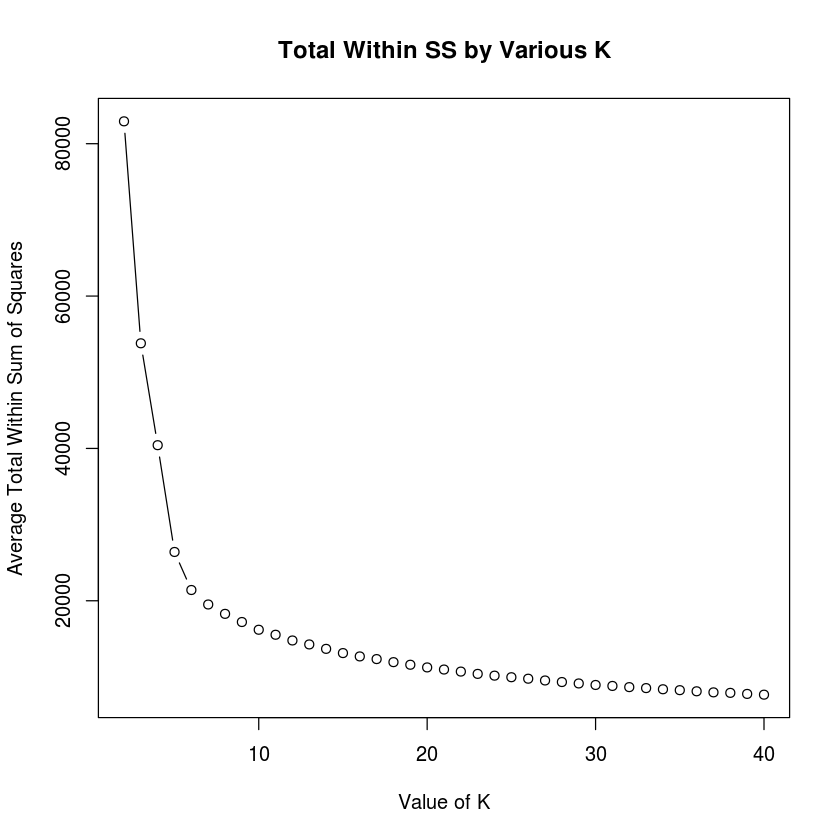

In [56]:
plot(rng,avg.totw.ss,type="b", main="Total Within SS by Various K",
 ylab="Average Total Within Sum of Squares",
 xlab="Value of K")

**From the grapgh above ,somewhere around K = 5 we start losing dramatic gains.  So we are satisfied with 5 clusters.**

Set the seed value

In [57]:
set.seed(769312867)

Run the K means algorithm for 5 clusters

In [58]:
kMeansForFive <-kmeans(pewData[,-c(1)], centers=5)

Print the centers obtained by running the above K Means algorithm for 5 Clusters

Before we interpret the above data we need to define a few values which were reperesented numeric in the given data

**WorkPlace Type**
1.	A large corporation
2.	A medium-size company
3.	A small business
4.	A part of the federal, state or local government
5.	A school or educational institution, OR
6.	A non-profit organization?
7.	(VOL.) Other
8.	(VOL.) Self-employed/work at home

**Education**
1.	Less than high school (Grades 1-8 or no formal schooling)
2.	High school incomplete (Grades 9-11 or Grade 12 with NO diploma)
3.	High school graduate (Grade 12 with diploma or GED certificate)
4.	Some college, no degree (includes some community college)
5.	Two year associate degree from a college or university
6.	Four year college or university degree/Bachelor’s degree (e.g., BS, BA, AB)
7.	Some postgraduate or professional schooling, no postgraduate degree
8.	Postgraduate or professional degree, including master’s, doctorate, medical or law degree (e.g., MA, MS, PhD, MD, JD)

**Income**
1.	Less than 10,000
2.	10 to under 20,000
3.	20 to under 30,000
4.	30 to under 40,000
5.	40 to under 50,000
6.	50 to under 75,000
7.	75 to under 100,000
8.	100 to under 150,000
9.	150,000 or more

**Race**
1.	White
2.	Black or African-American
3.	Asian or Pacific Islander
4.	Mixed race
5.	Native American/American Indian
6.	Other (SPECIFY)

In [59]:
kMeansForFive$centers

,workPlace,education,income,race,ageCat
1,2.000000,3.220339,3.165254,1.864407,3.317797
2,5.770642,4.623853,4.733945,1.467890,3.779817
3,4.880952,7.464286,7.470238,1.363095,4.797619
4,2.771429,6.638095,3.838095,1.561905,3.247619
5,1.844380,5.282421,7.440922,1.368876,4.178674


# Conclusion when there are 5 clusters :

1. Cluster1 : People who work in a medium sized company earns between 20 to 30,000 per annum. Most of them are high school graduate and between 30-40 age group. We can say such a group belongs to middle class society.

2. Cluster2 : People who work in an educational institute earns between 30 to 400,000 per annum. Most of them are some college degree holders and between 30-40 age group. We can say such a group belongs to middle class society.

3. Cluster3 : People who work in a Federal or Govt institutions earns between 70 to 100,000 per annum. Most of them are highly qualified and postgraduate degree holders and between 40-50 age group. We can say such a group belongs to upper class society.

4. Cluster4 : People who work in a small business earns between 30 to 40,000 per annum. Most of them have bachelors degree and between 30-40 age group. We can say such a group belongs to middle class society.

5. Cluster5 : People who work in a large corporation earns between 70 to 100,000 per annum. Most of them have college degrees or associate degree and between 30-40 age group. We can say such a group belongs to upper class society.

Plot the data between income and Work Place type below

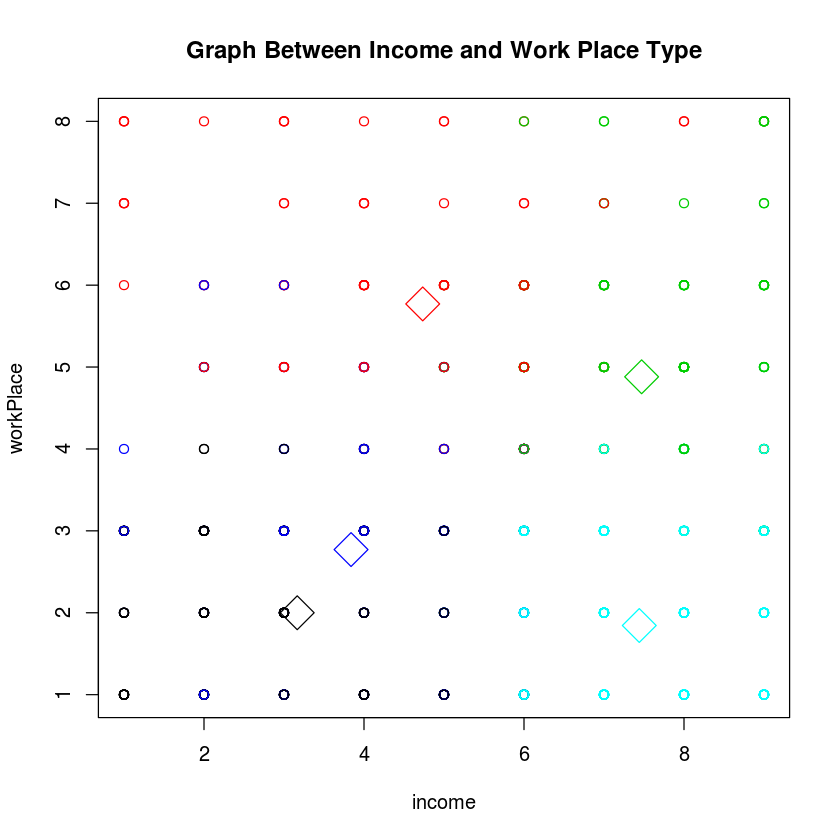

In [60]:
plot(pewData[c("income", "workPlace")], col=kMeansForFive$cluster, main = "Graph Between Income and Work Place Type")
points(kMeansForFive$centers[,c("income", "workPlace")], col=1:5, pch=23, cex=3)

Set the seed Value for 3 clusters

In [61]:
set.seed(7692)

Run the K Means algorithm for 3 clusters

In [62]:
kMeansForThree <-kmeans(pewData[,-c(1)], centers=3)

Print the centers obtained by running the above K Means algorithm for 3 Clusters

In [63]:
kMeansForThree$centers

,workPlace,education,income,race,ageCat
1,2.457317,3.734756,3.176829,1.771341,3.295732
2,5.285124,6.834711,6.380165,1.462810,4.297521
3,1.941772,5.491139,7.384810,1.349367,4.230380


# Conclusion when there are 3 clusters :

1. Cluster1 : People who work in a medium sized company or wons a small business earns between 20 to 30,000 per annum. Most of them are high school graduate or have associate degree and between 30-40 age group. We can say such a group belongs to middle class society.

2. Cluster2 : People who work in an educational institute or Federal or Govt institutions earns between 70 to 100,000 per annum.Most of them are highly qualified and postgraduate degree holders and between 40-50 age group. We can say such a group belongs to upper middle class society.

3. Cluster3 : People who work in a medium size comapny earns between 70 to 100,000 per annum. Most of them have some bachleors degree and between 40-50 age group. We can say such a group belongs to upper class society.

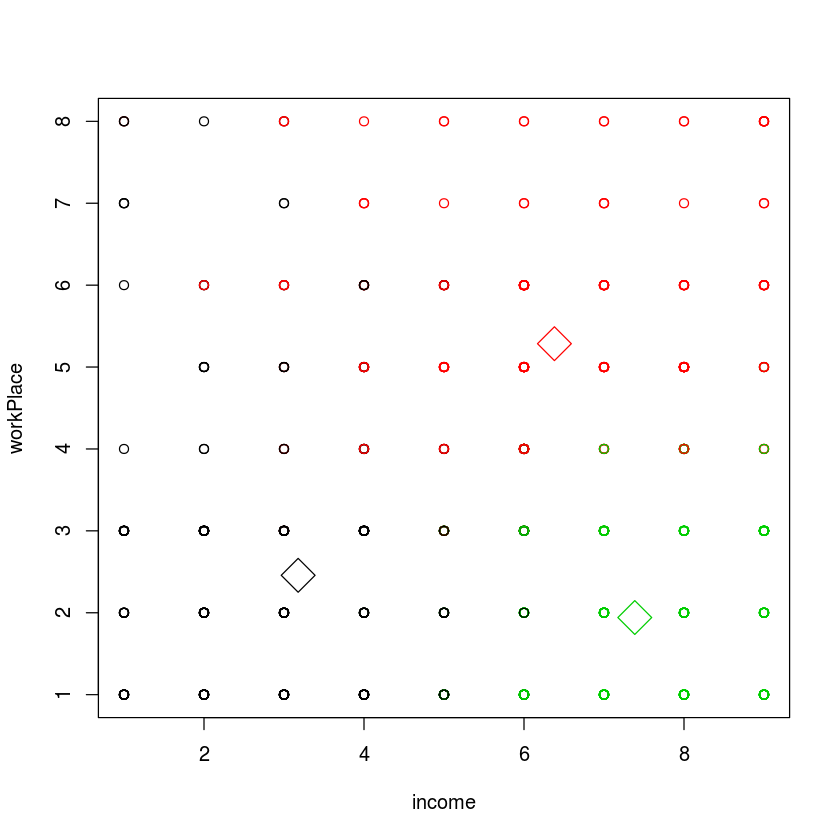

In [64]:
plot(pewData[c("income", "workPlace")], col=kMeansForThree$cluster)
points(kMeansForThree$centers[,c("income", "workPlace")], col=1:3, pch=23, cex=3)

# References

1. http://www.learnbymarketing.com/tutorials/k-means-clustering-in-r-example/
2. http://rischanlab.github.io/Kmeans.html
3. Class Notes